In [2]:
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\kombi\AppData\Local\Temp\ipykernel_11548\2876882311.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Charger les données à partir des fichiers CSV
population = pd.read_csv('population.csv')
dispo_alim = pd.read_csv('dispo_alimentaire.csv')
sous_alim = pd.read_csv('sous_nutrition.csv')
aide = pd.read_csv('aide_alimentaire.csv')

In [5]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [18]:
dispo_alim.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [6]:
dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [7]:
sous_alim.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [8]:
aide.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [14]:
# Convertir la colonne 'Valeur' en type numérique
sous_alim['Valeur'] = pd.to_numeric(sous_alim['Valeur'], errors='coerce')

# Calcul de la proportion de personnes en état de sous-nutrition
prop_sous_alim = sous_alim['Valeur'].mean()

# Affichage de la proportion de personnes en état de sous-nutrition
print("Proportion de personnes en état de sous-nutrition :", prop_sous_alim)



Proportion de personnes en état de sous-nutrition : 6.31904761904762


In [20]:
# Calcul du nombre théorique de personnes qui pourraient être nourries
dispo_alim_mondiale = dispo_alim['Disponibilité alimentaire en quantité (kg/personne/an)'].sum()
dispo_alim_vegetale = dispo_alim[dispo_alim['Origine'] == 'vegetal']['Disponibilité alimentaire en quantité (kg/personne/an)'].sum()

In [21]:
dispo_alim_mondiale

122201.94

In [22]:
dispo_alim_vegetale

0.0

In [23]:
# Utilisation de la disponibilité intérieure
utilisation_dispo_interieure = dispo_alim['Disponibilité intérieure'].sum()
alim_animale = dispo_alim['Aliments pour animaux'].sum()
pertes = dispo_alim['Pertes'].sum()
alim_humaine = utilisation_dispo_interieure - alim_animale - pertes


In [24]:
utilisation_dispo_interieure

9848994.0

In [25]:
alim_animale

1304245.0

In [26]:
pertes

453698.0

In [27]:
alim_humaine

8091051.0

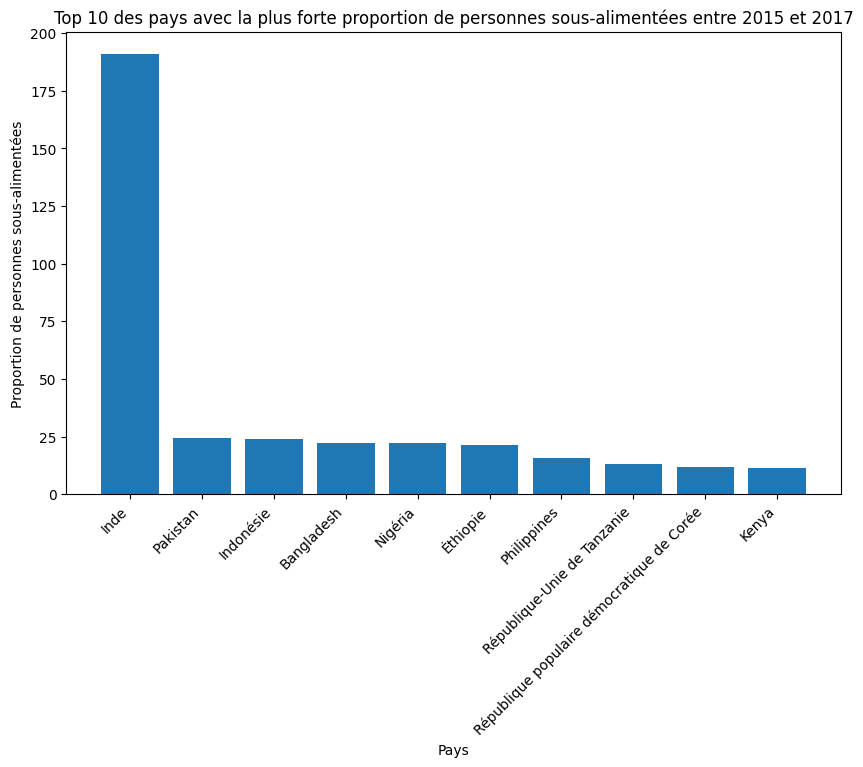

In [30]:
# Visualisations
# Exemple de visualisation : Barplot pour la proportion de personnes sous-alimentées par pays entre 2015 - 2017
top_pays_sous_alim = sous_alim[sous_alim['Année'] == "2015-2017"].nlargest(10, 'Valeur')
plt.figure(figsize=(10, 6))
plt.bar(top_pays_sous_alim['Zone'], top_pays_sous_alim['Valeur'])
plt.xlabel('Pays')
plt.ylabel('Proportion de personnes sous-alimentées')
plt.title('Top 10 des pays avec la plus forte proportion de personnes sous-alimentées entre 2015 et 2017')
plt.xticks(rotation=45, ha='right')
plt.show()


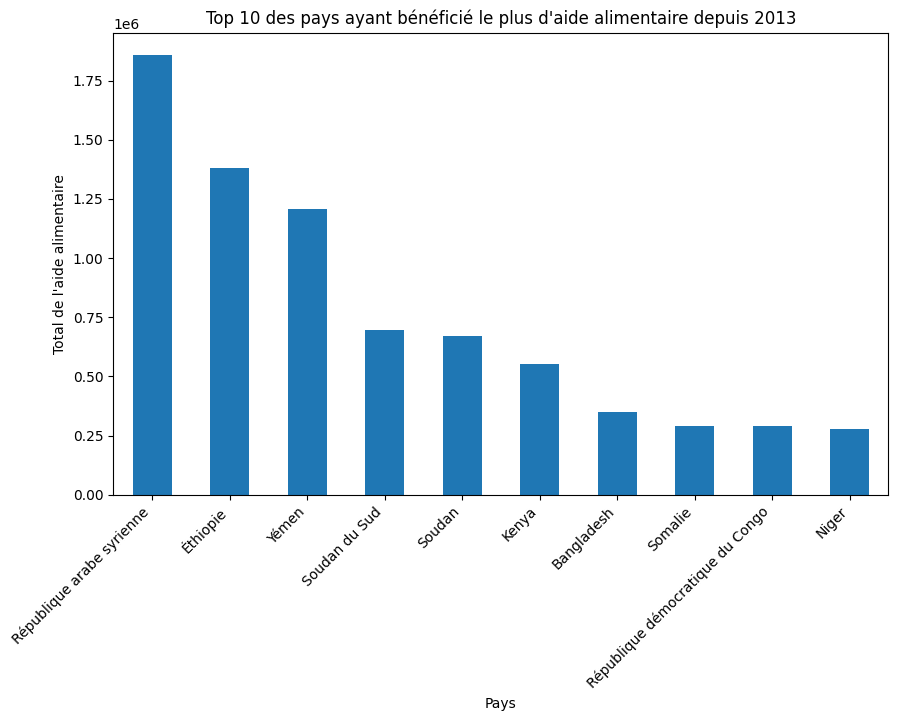

In [31]:
# Regroupement des données d'aide par pays et somme de l'aide depuis 2013
aide_par_pays = aide.groupby('Pays bénéficiaire')['Valeur'].sum()

# Sélection des pays ayant reçu le plus d'aide depuis 2013
top_pays_aide = aide_par_pays.nlargest(10)

# Visualisation
plt.figure(figsize=(10, 6))
top_pays_aide.plot(kind='bar')
plt.title('Top 10 des pays ayant bénéficié le plus d\'aide alimentaire depuis 2013')
plt.xlabel('Pays')
plt.ylabel('Total de l\'aide alimentaire')
plt.xticks(rotation=45, ha='right')
plt.show()

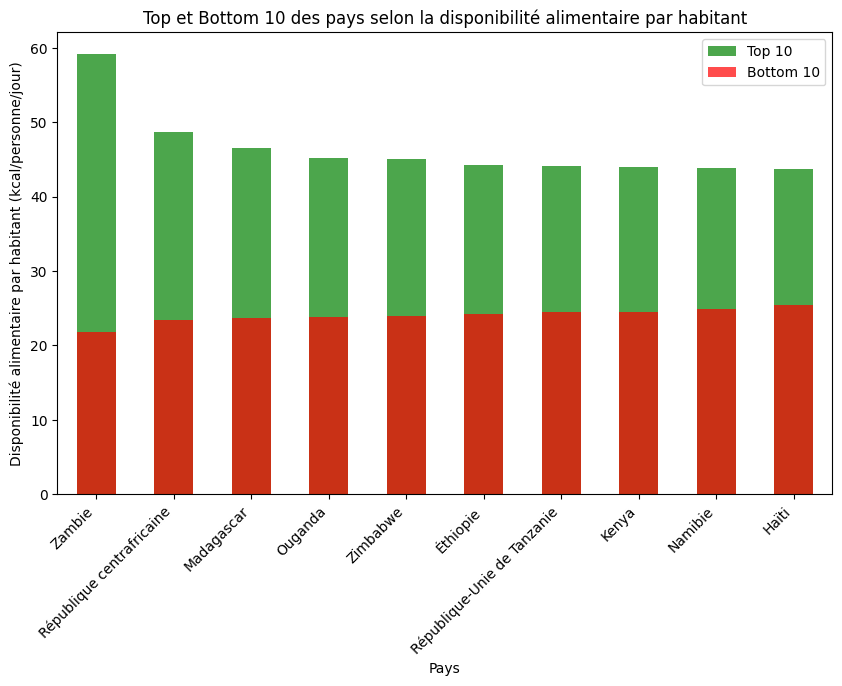

In [33]:
# Calcul de la disponibilité alimentaire par habitant (en kcal/personne/jour)
dispo_alim['Disponibilité alimentaire en quantité (kg/personne/an)'] = dispo_alim['Disponibilité alimentaire en quantité (kg/personne/an)'] / 365

# Calcul de la moyenne de la disponibilité alimentaire par habitant pour chaque pays
moyenne_dispo_alim_par_pays = dispo_alim.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].mean()

# Sélection des pays ayant le plus et le moins de disponibilité alimentaire par habitant
top_pays_dispo = moyenne_dispo_alim_par_pays.nlargest(10)
bottom_pays_dispo = moyenne_dispo_alim_par_pays.nsmallest(10)

# Visualisation
plt.figure(figsize=(10, 6))
top_pays_dispo.plot(kind='bar', color='green', alpha=0.7, label='Top 10')
bottom_pays_dispo.plot(kind='bar', color='red', alpha=0.7, label='Bottom 10')
plt.title('Top et Bottom 10 des pays selon la disponibilité alimentaire par habitant')
plt.xlabel('Pays')
plt.ylabel('Disponibilité alimentaire par habitant (kcal/personne/jour)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()